In [2]:
import pandas as pd
df = pd.read_csv("Nashville_housing_data_2013_2016.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       56636 non-null  int64  
 1   Unnamed: 0                         56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [4]:
# Drop unnecessary columns
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True)


In [10]:
# Check % of missing values per column
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)


suite/_condo___#    89.213574
half_bath           57.366339
bedrooms            57.343386
foundation_type     57.334558
year_built          57.332792
exterior_wall       57.332792
grade               57.332792
finished_area       57.331026
full_bath           57.135038
owner_name          55.397627
image               55.266968
total_value         54.062787
address             54.062787
city                54.062787
acreage             54.062787
tax_district        54.062787
land_value          54.062787
building_value      54.062787
state               54.062787
neighborhood        54.062787
property_city        0.280740
property_address     0.280740
dtype: float64

In [6]:
# Standardize column names: remove spaces, make lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [7]:
# Convert sale_date to datetime
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')


In [11]:
# Drop columns with more than 60% missing data
threshold = 0.6
cols_to_drop = missing_percent[missing_percent > threshold * 100].index
df.drop(columns=cols_to_drop, inplace=True)


In [12]:
# Fill numeric columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [13]:
# Fill object (text) columns with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [14]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)


In [15]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 56533 entries, 0 to 56635
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   parcel_id                          56533 non-null  object        
 1   land_use                           56533 non-null  object        
 2   property_address                   56533 non-null  object        
 3   property_city                      56533 non-null  object        
 4   sale_date                          56533 non-null  datetime64[ns]
 5   sale_price                         56533 non-null  int64         
 6   legal_reference                    56533 non-null  object        
 7   sold_as_vacant                     56533 non-null  object        
 8   multiple_parcels_involved_in_sale  56533 non-null  object        
 9   owner_name                         56533 non-null  object        
 10  address                            5653

(None,
           parcel_id           land_use   property_address property_city  \
 0  105 03 0D 008.00  RESIDENTIAL CONDO    1208  3RD AVE S     NASHVILLE   
 1   105 11 0 080.00      SINGLE FAMILY   1802  STEWART PL     NASHVILLE   
 2   118 03 0 130.00      SINGLE FAMILY  2761  ROSEDALE PL     NASHVILLE   
 3   119 01 0 479.00      SINGLE FAMILY  224  PEACHTREE ST     NASHVILLE   
 4   119 05 0 186.00      SINGLE FAMILY      316  LUTIE ST     NASHVILLE   
 
    sale_date  sale_price   legal_reference sold_as_vacant  \
 0 2013-01-24      132000  20130128-0008725             No   
 1 2013-01-11      191500  20130118-0006337             No   
 2 2013-01-18      202000  20130124-0008033             No   
 3 2013-01-18       32000  20130128-0008863             No   
 4 2013-01-23      102000  20130131-0009929             No   
 
   multiple_parcels_involved_in_sale                     owner_name  ...  \
 0                                No            JRG PROPERTIES, LLC  ...   
 1       

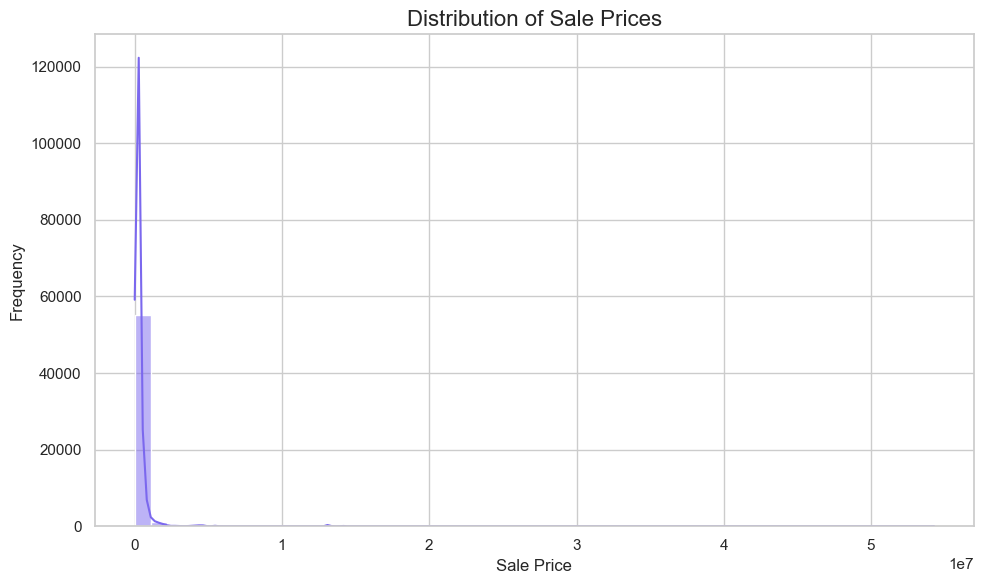

,sale_price,finished_area,year_built,bedrooms,full_bath,half_bath
count,5.653300e+04,56533.000000,56533.000000,56533.000000,56533.000000,56533.000000
mean,3.275023e+05,1758.173875,1961.593972,3.038544,1.951320,0.121062
std,9.295563e+05,1112.475311,17.435922,0.559029,0.632277,0.348183
min,5.000000e+01,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
50%,2.058750e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,3.290000e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
max,5.427806e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for colorful plots
sns.set(style="whitegrid", palette="muted")

# 1. Basic descriptive statistics
desc_stats = df[['sale_price', 'finished_area', 'year_built', 'bedrooms', 'full_bath', 'half_bath']].describe()

# 2. Distribution of Sale Price
plt.figure(figsize=(10, 6))
sns.histplot(df['sale_price'], bins=50, kde=True, color='mediumslateblue')
plt.title('Distribution of Sale Prices', fontsize=16)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

desc_stats


C:\Users\hp\AppData\Local\Temp\ipykernel_6588\4183092022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='land_use', y='sale_price', data=df, palette="Set2")
) missing from font(s) Arial.p\ipykernel_6588\4183092022.py:8: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) Arial.ython\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


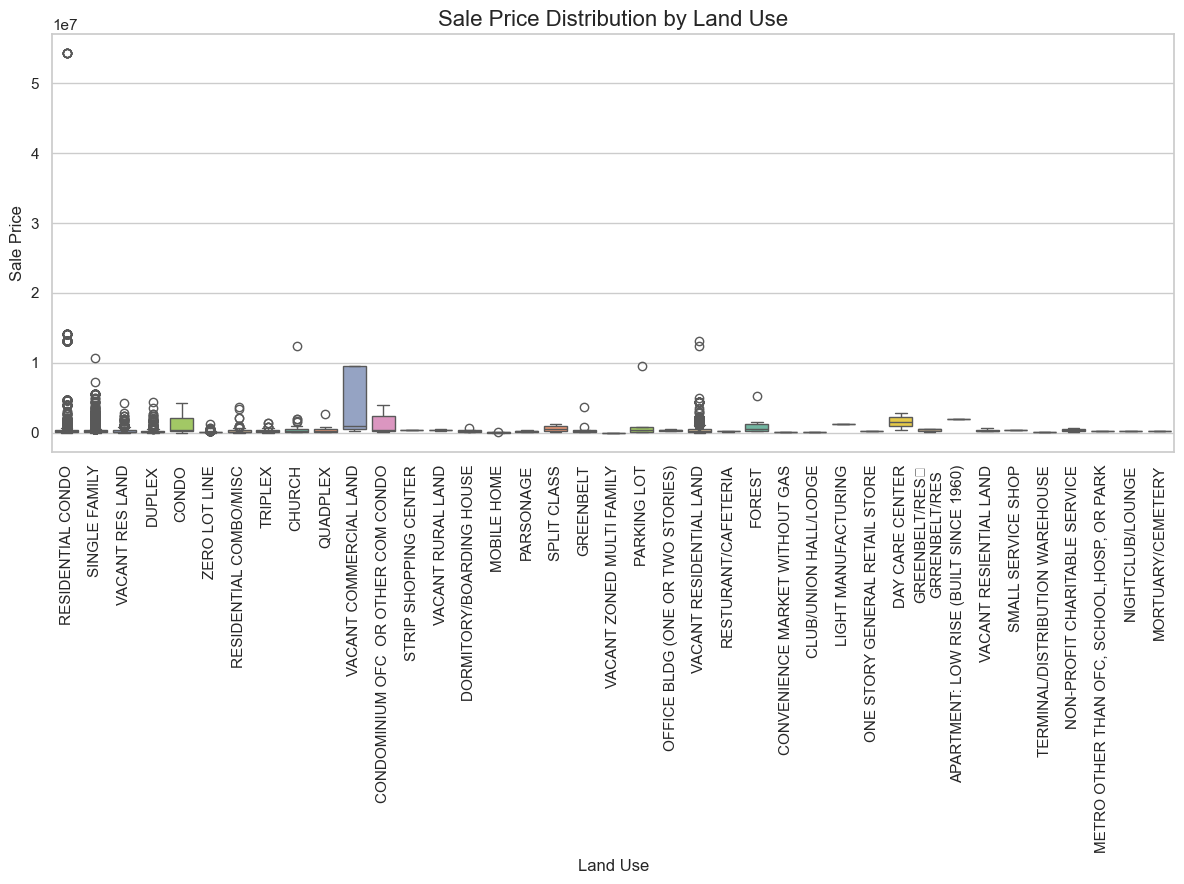

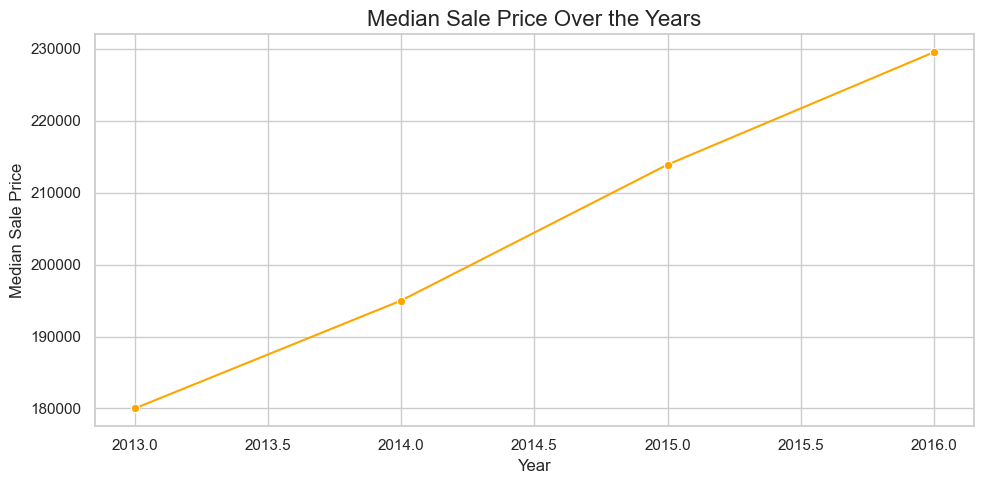

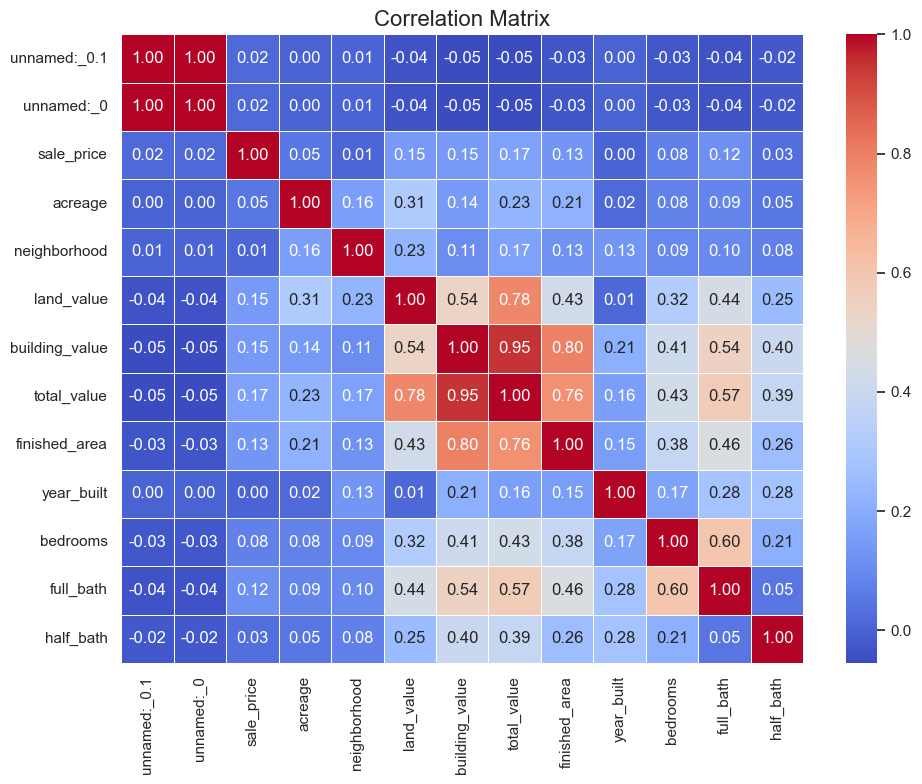

C:\Users\hp\AppData\Local\Temp\ipykernel_6588\4183092022.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bedrooms', palette='viridis')


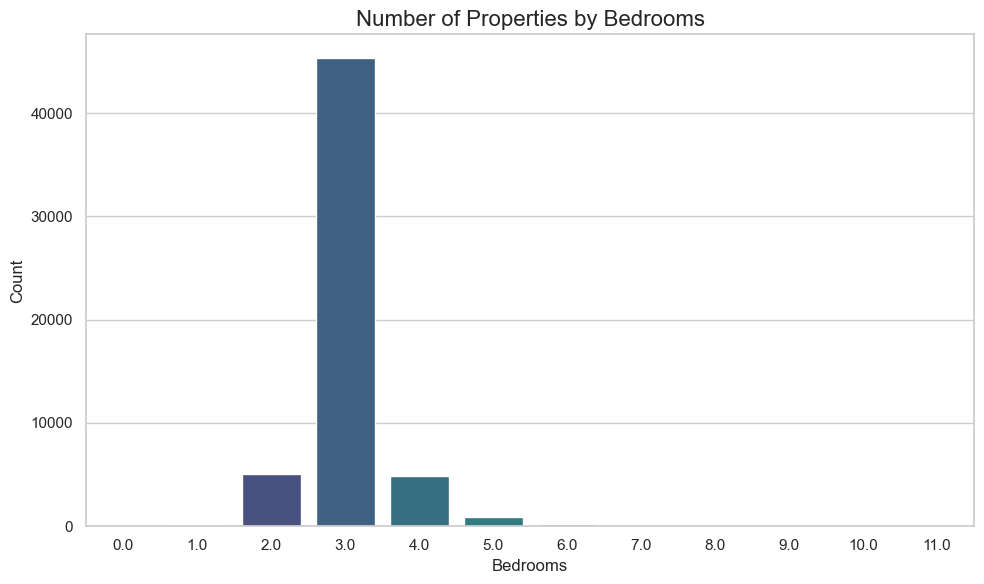

In [22]:
# 1. Boxplot: Sale Price by Land Use
plt.figure(figsize=(12, 9))
sns.boxplot(x='land_use', y='sale_price', data=df, palette="Set2")
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Land Use', fontsize=16)
plt.xlabel('Land Use')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

# 2. Line Plot: Median Sale Price Over Years
df['year'] = df['sale_date'].dt.year
median_prices_by_year = df.groupby('year')['sale_price'].median()

plt.figure(figsize=(10, 5))
sns.lineplot(x=median_prices_by_year.index, y=median_prices_by_year.values, marker="o", color='orange')
plt.title('Median Sale Price Over the Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Heatmap: Correlation between Numeric Variables
plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# 4. Countplot: Number of Properties by Bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bedrooms', palette='viridis')
plt.title('Number of Properties by Bedrooms', fontsize=16)
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
